# EDA Structured
## TASK 1: Set up environment and Load data
* Intall and import neccessary packages
* Display the table format of the dataset we wanted to explore

## TASK 2: CLEAN AND PREPROCESS DATA
* Clean data:
 * Remove unnecessary rows/ columns, fill-in or remove missing values
* Data enrichment:
 * Merging or Appending data to add more attributes or objects
  * Calcalate new columns based on existing attributes

## TASK 3: Report
* Report and Visualize what happend with the business through the data

#TASK 1: Set up environment and Load data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')
directory_path = '/content/drive/My Drive/Data'
df = [f'sales2019_{i}.csv' for i in range(1, 13)]
dataframes = []
for file in df:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)
df = pd.concat(dataframes)
df.reset_index(drop=True, inplace=True)
df.sample(5)

Mounted at /content/drive


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
122633,258348,AAA Batteries (4-pack),1,2.99,09/30/19 19:56,"251 7th St, San Francisco, CA 94016"
142742,277526,27in FHD Monitor,1,149.99,10/26/19 13:32,"4 Adams St, Atlanta, GA 30301"
51401,NaN,NaN,NaN,NaN,NaN,NaN
68972,207036,AAA Batteries (4-pack),2,2.99,05/23/19 14:47,"958 Jackson St, New York City, NY 10001"
55163,193902,34in Ultrawide Monitor,1,379.99,04/09/19 13:32,"986 North St, New York City, NY 10001"


In [2]:
df.shape

(186850, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [4]:
df.describe().T

,count,unique,top,freq
Order ID,186305,178438,Order ID,355
Product,186305,20,USB-C Charging Cable,21903
Quantity Ordered,186305,10,1,168552
Price Each,186305,24,11.95,21903
Order Date,186305,142396,Order Date,355
Purchase Address,186305,140788,Purchase Address,355


#TASK 2: CLEAN AND PREPROCESS DATA

In [5]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df_null = df[df.isna().any(axis = 1)]
df_null

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(inplace = True)
df.reset_index(drop=True,inplace=True )

In [8]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
df.duplicated().sum()

618

In [10]:
df_duplicates = df[df.duplicated()]
df_duplicates

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
872,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
1098,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1190,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1890,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2456,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184527,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184542,317971,AA Batteries (4-pack),1,3.84,12/17/19 18:39,"250 Chestnut St, San Francisco, CA 94016"
184938,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185381,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
df = df.drop_duplicates()
df.duplicated().sum()
df.reset_index(drop=True,inplace=True )
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185682,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
185683,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
185684,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
185685,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [12]:
df = df[df["Product"] != "Product"]
df[df["Product"]=="Product"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df.to_csv("Data_Clean.csv", index=False)

#TASK 3: Report

In [14]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185682,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
185683,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
185684,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
185685,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [15]:
df['Order ID'] = df['Order ID'].astype(int)
df['Product'] = df['Product'].astype(str)
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Purchase Address'] = df['Purchase Address'].astype(str)
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185686 entries, 0 to 185686
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  int64         
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [16]:
df["Month"] = df["Order Date"].dt.month
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
185682,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12
185683,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12
185684,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12
185685,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12


In [17]:
df["Total Price"] = df["Quantity Ordered"]*df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total Price
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99
...,...,...,...,...,...,...,...,...
185682,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95
185683,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68
185684,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00
185685,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99


In [18]:
moving_total_price = df.pop("Total Price")
moving_month= df.pop("Month")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
185682,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
185683,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
185684,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
185685,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [19]:
df.insert(4,"Total Price",moving_total_price)

In [20]:
df.insert(6,"Month",moving_month)
df

,Order ID,Product,Quantity Ordered,Price Each,Total Price,Order Date,Month,Purchase Address
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...,...,...
185682,319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,12,"14 Madison St, San Francisco, CA 94016"
185683,319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,12,"549 Willow St, Los Angeles, CA 90001"
185684,319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,12,"273 Wilson St, Seattle, WA 98101"
185685,319669,Wired Headphones,1,11.99,11.99,2019-12-03 10:39:00,12,"778 River St, Dallas, TX 75001"


### 3.1 What was the best month for sales? How much was earned that month?

In [21]:
df_salasbymonths = df.groupby(df["Month"]).agg({"Total Price":"sum"}).rename(columns={"Total Price":"Sales"})
max_sales_month = df_salasbymonths['Sales'].idxmax()
max_sales_value = df_salasbymonths.loc[max_sales_month, 'Sales']
print(f"The month with the highest sales is {max_sales_month} with sales of {max_sales_value}")

The month with the highest sales is 12 with sales of 4608295.7


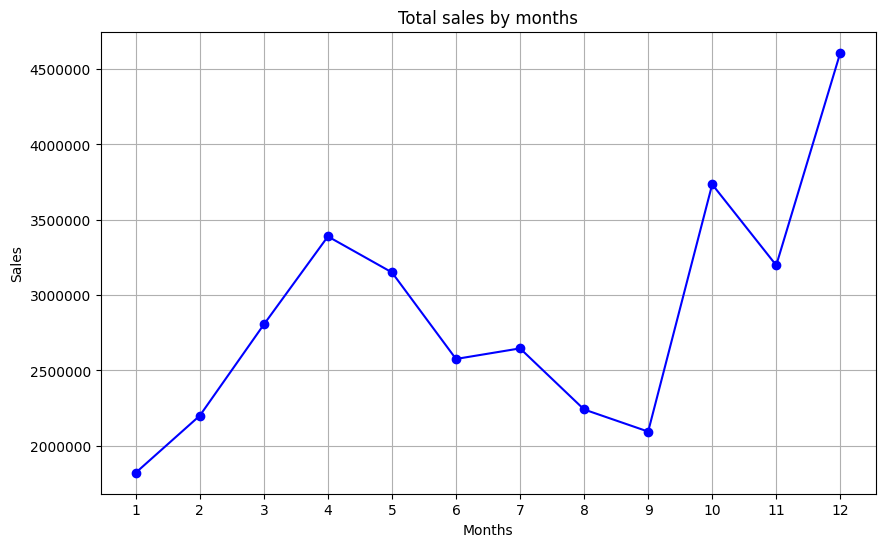

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df_salasbymonths.index, df_salasbymonths['Sales'], marker='o', linestyle='-', color='b')
plt.title('Total sales by months')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.xticks(df_salasbymonths.index)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.show()

### 3.2 What city has the best sales?

In [23]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Total Price',
       'Order Date', 'Month', 'Purchase Address'],
      dtype='object')

In [24]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df

,Order ID,Product,Quantity Ordered,Price Each,Total Price,Order Date,Month,Purchase Address,City
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215",Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035",Portland
2,141236,Wired Headphones,2,11.99,23.98,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237,27in FHD Monitor,1,149.99,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238,Wired Headphones,1,11.99,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301",Austin
...,...,...,...,...,...,...,...,...,...
185682,319666,Lightning Charging Cable,1,14.95,14.95,2019-12-11 20:58:00,12,"14 Madison St, San Francisco, CA 94016",San Francisco
185683,319667,AA Batteries (4-pack),2,3.84,7.68,2019-12-01 12:01:00,12,"549 Willow St, Los Angeles, CA 90001",Los Angeles
185684,319668,Vareebadd Phone,1,400.00,400.00,2019-12-09 06:43:00,12,"273 Wilson St, Seattle, WA 98101",Seattle
185685,319669,Wired Headphones,1,11.99,11.99,2019-12-03 10:39:00,12,"778 River St, Dallas, TX 75001",Dallas


In [25]:
set(df['City'])

{' Atlanta',
 ' Austin',
 ' Boston',
 ' Dallas',
 ' Los Angeles',
 ' New York City',
 ' Portland',
 ' San Francisco',
 ' Seattle'}

In [26]:
df_salesbycity = df.groupby(df.City).agg({"Total Price":"sum"}).rename(columns={"Total Price":"Sales"})
max_sales_city = df_salesbycity['Sales'].idxmax()
max_sales_city_value = df_salesbycity.loc[max_sales_city, 'Sales']
print(f"The city with the highest sales is {max_sales_city} with sales of {max_sales_city_value}")

The city with the highest sales is  San Francisco with sales of 8254743.55


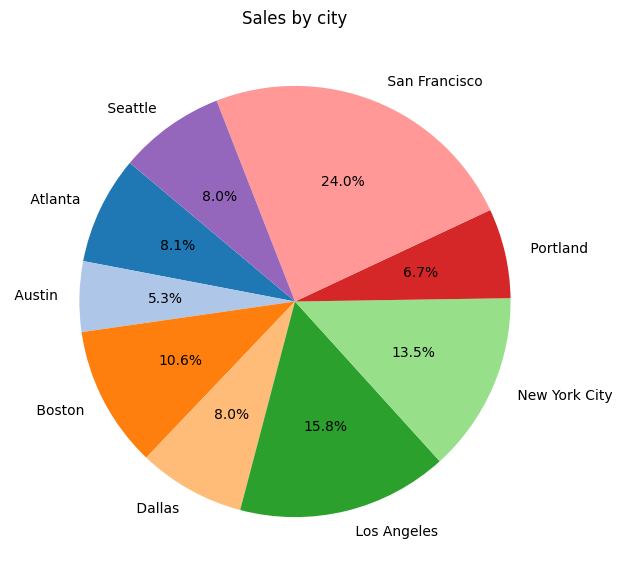

In [27]:
plt.figure(figsize=(10, 7))
plt.pie(df_salesbycity['Sales'], labels=df_salesbycity.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Sales by city')
plt.show()

### 3.3 What time should we display ads to maximize the likelihood of customer’s buying product?

In [28]:
df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Total Price,Order Date,Month,Purchase Address,City
0,141234,iPhone,1,700.00,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215",Boston
1,141235,Lightning Charging Cable,1,14.95,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035",Portland


In [29]:
df["Hours"] = df["Order Date"].dt.hour
set(df["Hours"])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

In [30]:
df_salesbyhours = df.groupby(df["Hours"]).agg({"Order ID":"count"}).rename(columns={"Order ID":"Orders"})
df_salesbyhours

,Orders
Hours,
0,3902
1,2347
2,1242
3,830
4,852
5,1320
6,2481
7,4002
8,6252


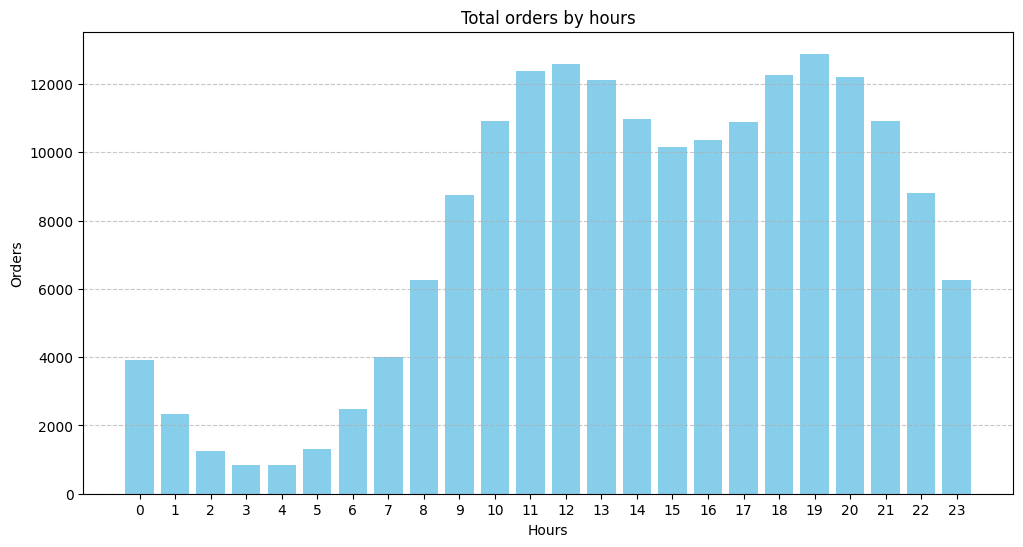

In [31]:
plt.figure(figsize=(12, 6))
plt.bar(df_salesbyhours.index, df_salesbyhours['Orders'], color='skyblue')
plt.title('Total orders by hours')
plt.xlabel('Hours')
plt.ylabel('Orders')
plt.xticks(df_salesbyhours.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.4 What products are most often sold together?

In [32]:
import warnings
warnings.filterwarnings("ignore")
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
from itertools import combinations
from collections import Counter

count = Counter()

for products in df_dup['All Products']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

count_df = pd.DataFrame(count.items(), columns=['Product Pair', 'Count'])

count_df.sort_values("Count", ascending=False).head(5)


,Product Pair,Count
11,"(iPhone, Lightning Charging Cable)",1002
3,"(Google Phone, USB-C Charging Cable)",985
7,"(iPhone, Wired Headphones)",447
18,"(Google Phone, Wired Headphones)",413
14,"(Vareebadd Phone, USB-C Charging Cable)",361


### 3.5 What product sold the most? Why do you think it sold the most?

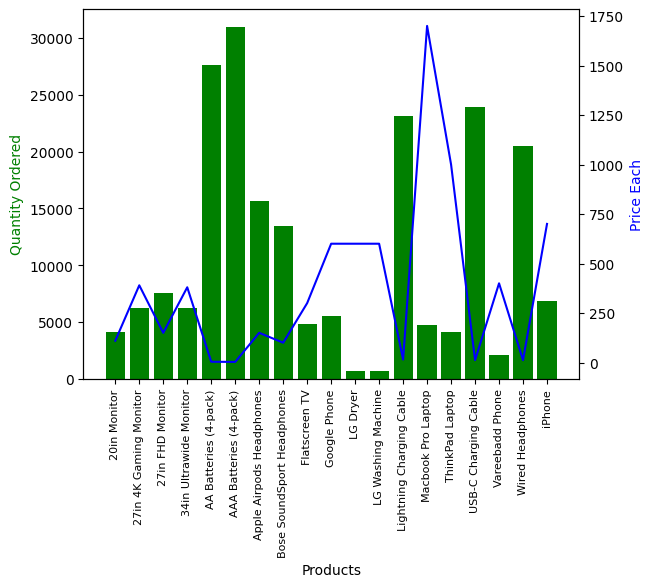

In [33]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
all_products = df.groupby('Product')['Quantity Ordered'].sum()
prices = df.groupby('Product')['Price Each'].mean()
products_ls = all_products.index.tolist()
x = products_ls
y1 = all_products.values
y2 = prices.values
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')
ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')
plt.show()
